If you feed a handwritten digit, neural network(trained model) should tell what the digit is

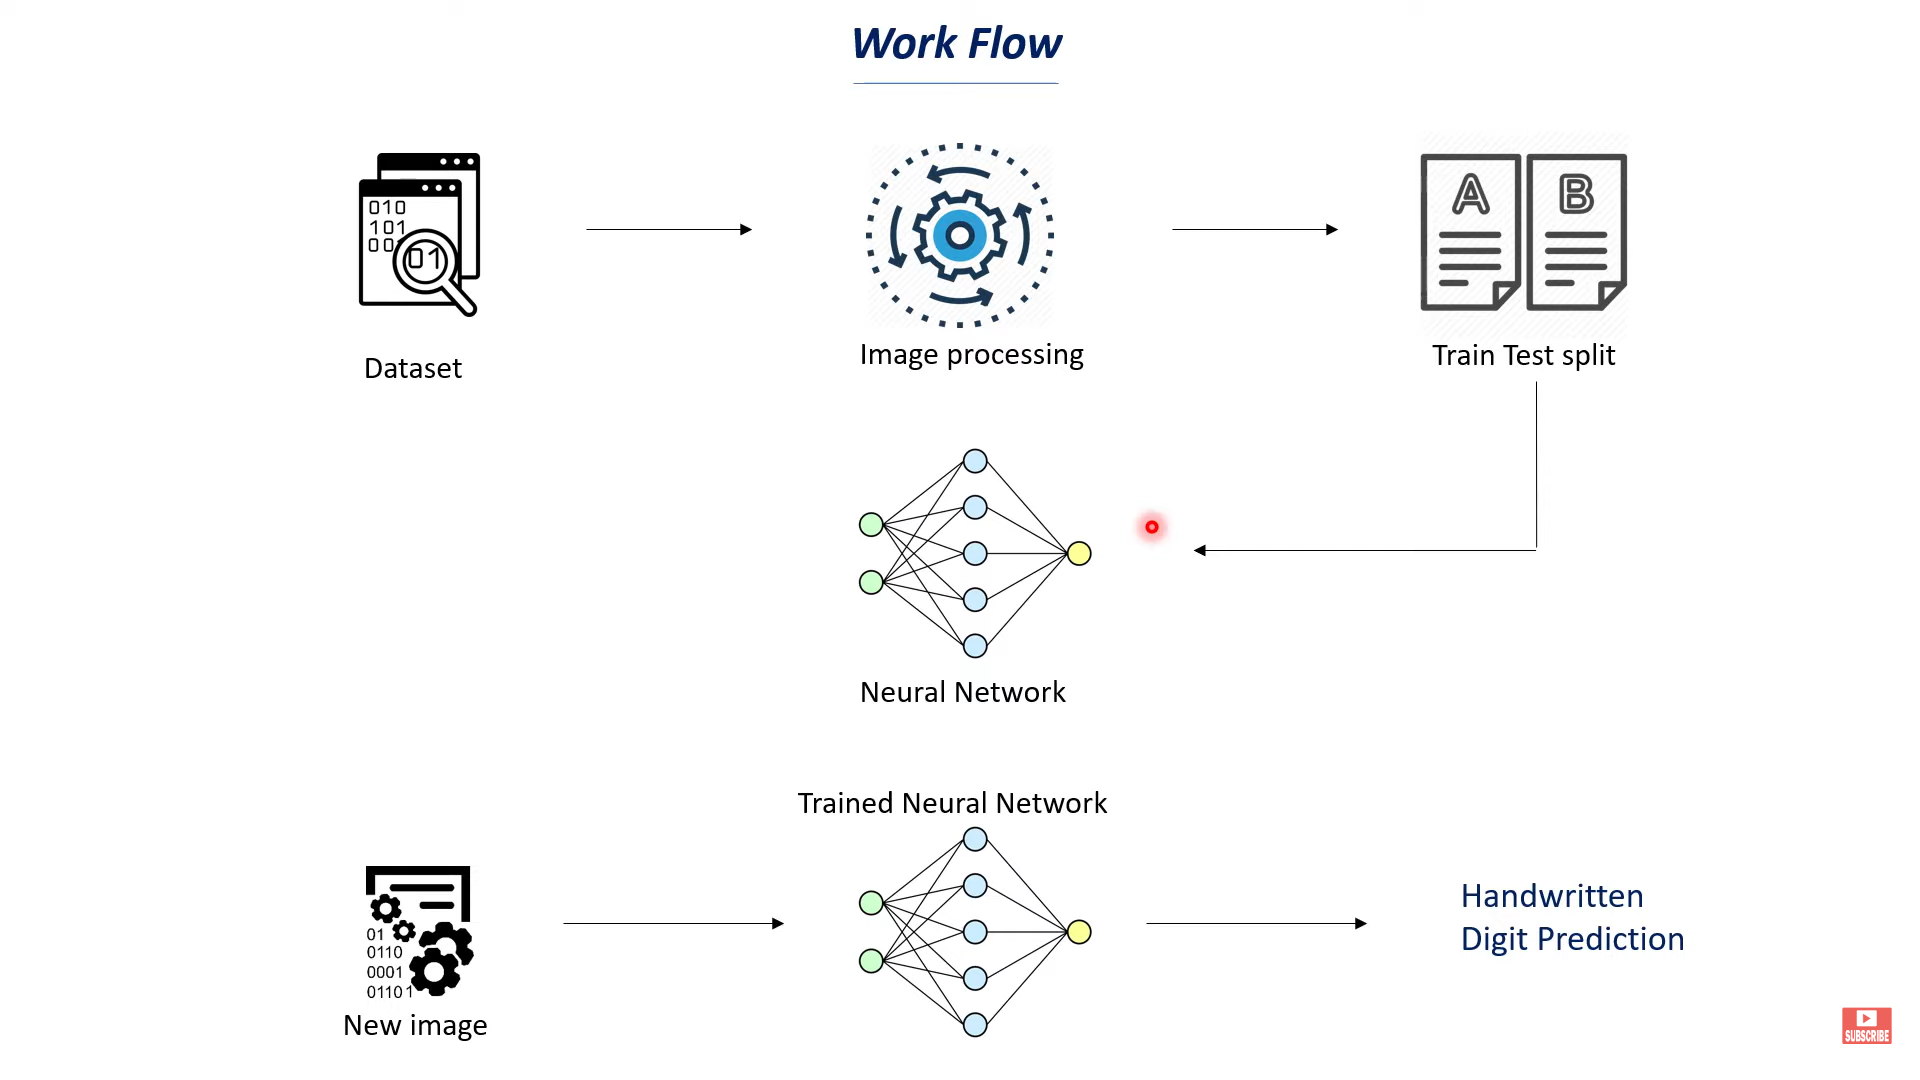

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # image recognition task me used
from google.colab.patches import cv2_imshow # spider, pycharm me ise use krne ki aavshykta nhi hai, colab direct cv2 ke inbuilt function ko use nhi krne deta hai, jisse hm image show kr payen
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3) # taki accuracy fixed aaye hr bar
from tensorflow import keras
from keras.datasets import mnist # it's like sklearn datasets eg breast cancer dataset
from tensorflow.math import confusion_matrix

 tf.random.set_seed(3) is a function call in TensorFlow that sets the global random seed for the TensorFlow random number generator. Setting a random seed helps ensure that the random numbers generated by TensorFlow are reproducible. This means that if you run your code multiple times with the same random seed, you will get the same random numbers each time.

MNIST stands for the "Modified National Institute of Standards and Technology" database. It is a well-known dataset in the field of machine learning and computer vision. The MNIST dataset consists of a large collection of handwritten digits, which are commonly used for various tasks in image classification and deep learning. Each image in the MNIST dataset is a grayscale image of a handwritten digit (0 through 9), and the dataset is often used for training and evaluating algorithms for digit recognition.

The MNIST dataset has been widely used as a benchmark for testing and developing machine learning models and algorithms, especially for tasks related to image classification and deep learning. It is a popular choice for beginners in the field of machine learning and is often used in tutorials and educational materials to demonstrate the concepts of image classification and neural networks.

In [8]:
# loading the mnist data from keras dataset


MNIST digits classification dataset

load_data function


tf.keras.datasets.mnist.load_data(path="mnist.npz")      #
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

Arguments

path: path where to cache the dataset locally (relative to ~/.keras/datasets).
Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).


x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

Example

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


assert x_train.shape == (60000, 28, 28)


assert x_test.shape == (10000, 28, 28)


assert y_train.shape == (60000,)


assert y_test.shape == (10000,)

In [9]:
# loading the mnist data from keras.datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
type(x_train)

numpy.ndarray

In [11]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


x_train contains 60000 images, and each images contains 28*28 pixels

y_train is nothing but labels wrt each x_train

x_test is again 10000 images of 28*28 pixels, and

y_test that will help us to compare the accuracy of our predicted model with respect to y_test i.e. the actual labels for the test data

x_train me 3 is not mentioned = all images are gray_scale images

1. training data = 60,000 images
2. test data = 10,000 images
3. all are grayscale images
4. train test split is already done and given
5. hence we don't need to do any processing like previous video

In [12]:
# printing the 10th image

print(x_train[10]) # it will be a 28*28 , 2D matrix

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [13]:
# let's get image from numpy
print(x_train[10].shape)

(28, 28)


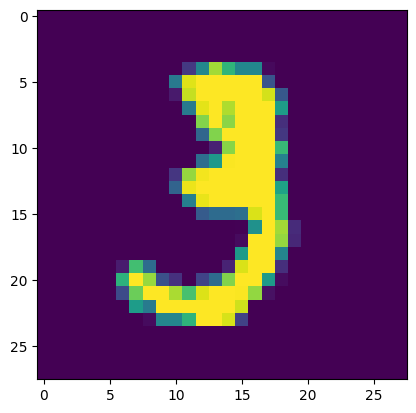

label of 10th image is 3


In [14]:
# displaying the image
plt.imshow(x_train[10])
plt.show()

# also 10th image ka label/ actual value
print("label of 10th image is",y_train[10])

this is atually a grayscale image, but this color we are seeing is just because of matplotlib.show() function

In [15]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [16]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

# in ideal splitting all 10 labels(0 to 9) should be in both train and test labels.
# tbhi sahi model bn payega

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use this label directly, also we can do one hot encoding for the label if we wish, but let's use it as it is.

in one hot encoding , if actual label is 3 for some dataset(having total 10 labels), one hot encoding will be : [0,0,0,1,0,0,0,0,0,0]

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [17]:
# scalling the values

# normalizing : accuracy badh jayegi normalization se

x_train = x_train/255
x_test = x_test/255

# see test and train both x's are simultaneously being normalized, keep in mind, bad me krne ki aavshyakta nhi hai

# 255 is max, hence 0/255 = 0 and 255/255 =1. so all values 0 se 1 ke beech aa gyi beacure of max normalization techniques. All the values are devided by max value(assuming 255 in all)

In [18]:
print(x_train[10]) # int to float ho gyi sari

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# building the neural network

CNN(very efficient neural network for image data) na use krte hue, simple NN use krte hain. NN = neural network

In [19]:
# setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) , # input_shape = (28,28, 3) for rgv images
    keras.layers.Dense(50, activation = 'relu'), # 50 nodes/neurons in hidden layer1
    keras.layers.Dense(50,activation = 'relu'),  # 50 nerons/nodes in hidden layer 2
    keras.layers.Dense(10,activation = 'sigmoid') # 10 classes so output me 10 neurons/nodes
])

In [20]:
# compaling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [21]:
# training the neural network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1372 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1042 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0846 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0694 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0467 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.035

In [22]:
# jyada time nhi lga since 28*28 are very small-small images
# accuracy final on training data = 98.8 % so high. accuracy increases in each epochs, lopss function decreases in each epochs

In [23]:
# aacuracy on test data : model evaluation
loss, accuracy = model.evaluate(x_test, y_test) # model x_test ke basis pr prediction karega, and simultaneously y_test se compare bhi kr lega

313/313 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9730


so test data accuracy = 97 % , that is the beauty of neural networks. so high accuracy

In [24]:
print(x_test.shape)

(10000, 28, 28)


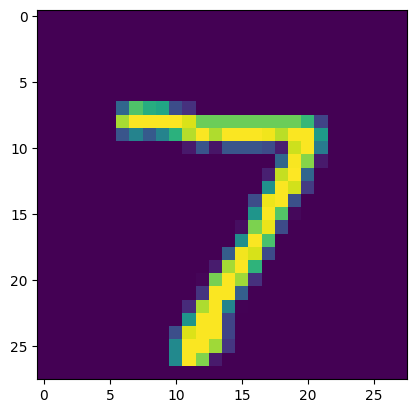

In [25]:
# first datapoint in test data # 2d array se image banana
plt.imshow(x_test[0])
plt.show()

In [26]:
# true label for the first datapoint

print(y_test[0])

7


In [27]:
# model dvara prediction ?? uske liye first store model prediction. Then
# max max probability vale label ko dataset pr assign kro. Then comparison possible

In [28]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [29]:
y_pred[0] # that is a 1D array. Each label me us dataset ke paye jane ki probability.

array([1.1176218e-02, 4.7473577e-03, 3.4840193e-02, 1.3240597e-01,
       3.5477471e-05, 8.7075464e-02, 9.0039379e-08, 9.9999988e-01,
       3.4946419e-02, 1.2258820e-02], dtype=float32)

In [30]:
# converting the prediction probabilityies to class labels

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [31]:
# so we can see actual and prediction labels are same for the first datapoint

In [32]:
# converting the prediction probabilities to call label for all the 10000 test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [33]:
len(y_pred_labels)


10000

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusion Matrix

In [34]:
conf_mat = confusion_matrix(y_test, y_pred_labels) # similar to accuracy score : 2 arguments , first is y_test(true labels on test), 2nd is y_pred_labels
# used/came from : from tensorflow.math import confusion_matrix

In [35]:
print(conf_mat)

tf.Tensor(
[[ 960    0    2    1    1    8    3    2    3    0]
 [   0 1122    1    2    0    2    2    0    6    0]
 [   3    5  992    7    2    1    2    7   13    0]
 [   0    0    2  987    0    5    1    5    7    3]
 [   1    0    0    0  970    0    2    1    1    7]
 [   2    0    0    9    0  869    2    1    4    5]
 [   1    3    2    1    6    9  931    1    4    0]
 [   0    6    8    5    1    1    0  996    5    6]
 [   0    0    5    9    6    8    1    4  938    3]
 [   0    3    1    9   18    5    1    5    4  963]], shape=(10, 10), dtype=int32)


What is confusion matrix. First for binary then for multiclass classification systems ?

A confusion matrix is a way to evaluate the performance of a classification model. **It is a square matrix that is used to summarize the results of a classification problem. Typically, the matrix is used for binary classification (two classes) and multi-class classification (more than two classes).** Let me explain with two examples:

### Binary Classification Confusion Matrix

In a binary classification problem, there are two classes: "Positive" and "Negative." So very simple to analyse.

 Binary me meri trick bhi work kr jati hai, ki TN=prediction was true, and actual was negative = > prediction was 0.
Since 0 is only negative in binarry classification. 1 is only positive in binary classification. So bilkul easy bn jata hai.

Here's a typical binary confusion matrix:

```
               Predicted Positive     Predicted Negative
Actual Positive     True Positive (TP)   False Negative (FN)
Actual Negative     False Positive (FP)  True Negative (TN)
```

- **True Positive (TP):** Instances that were correctly predicted as "Positive."(1)
- **True Negative (TN):** Instances that were correctly predicted as "Negative."(0)
- **False Positive (FP):** Instances that were incorrectly predicted as "Positive"(1) when they are actually "Negative."(0) (Type I error)
- **False Negative (FN):** Instances that were incorrectly predicted as "Negative"(0) when they are actually "Positive."(1) (Type II error)

### Multi-Class (10 Labels) Classification Confusion Matrix

TP, TN, FP, FN ke terms me smjh pana is very hard for me. Let's undersatnd the required and enough stuffs:

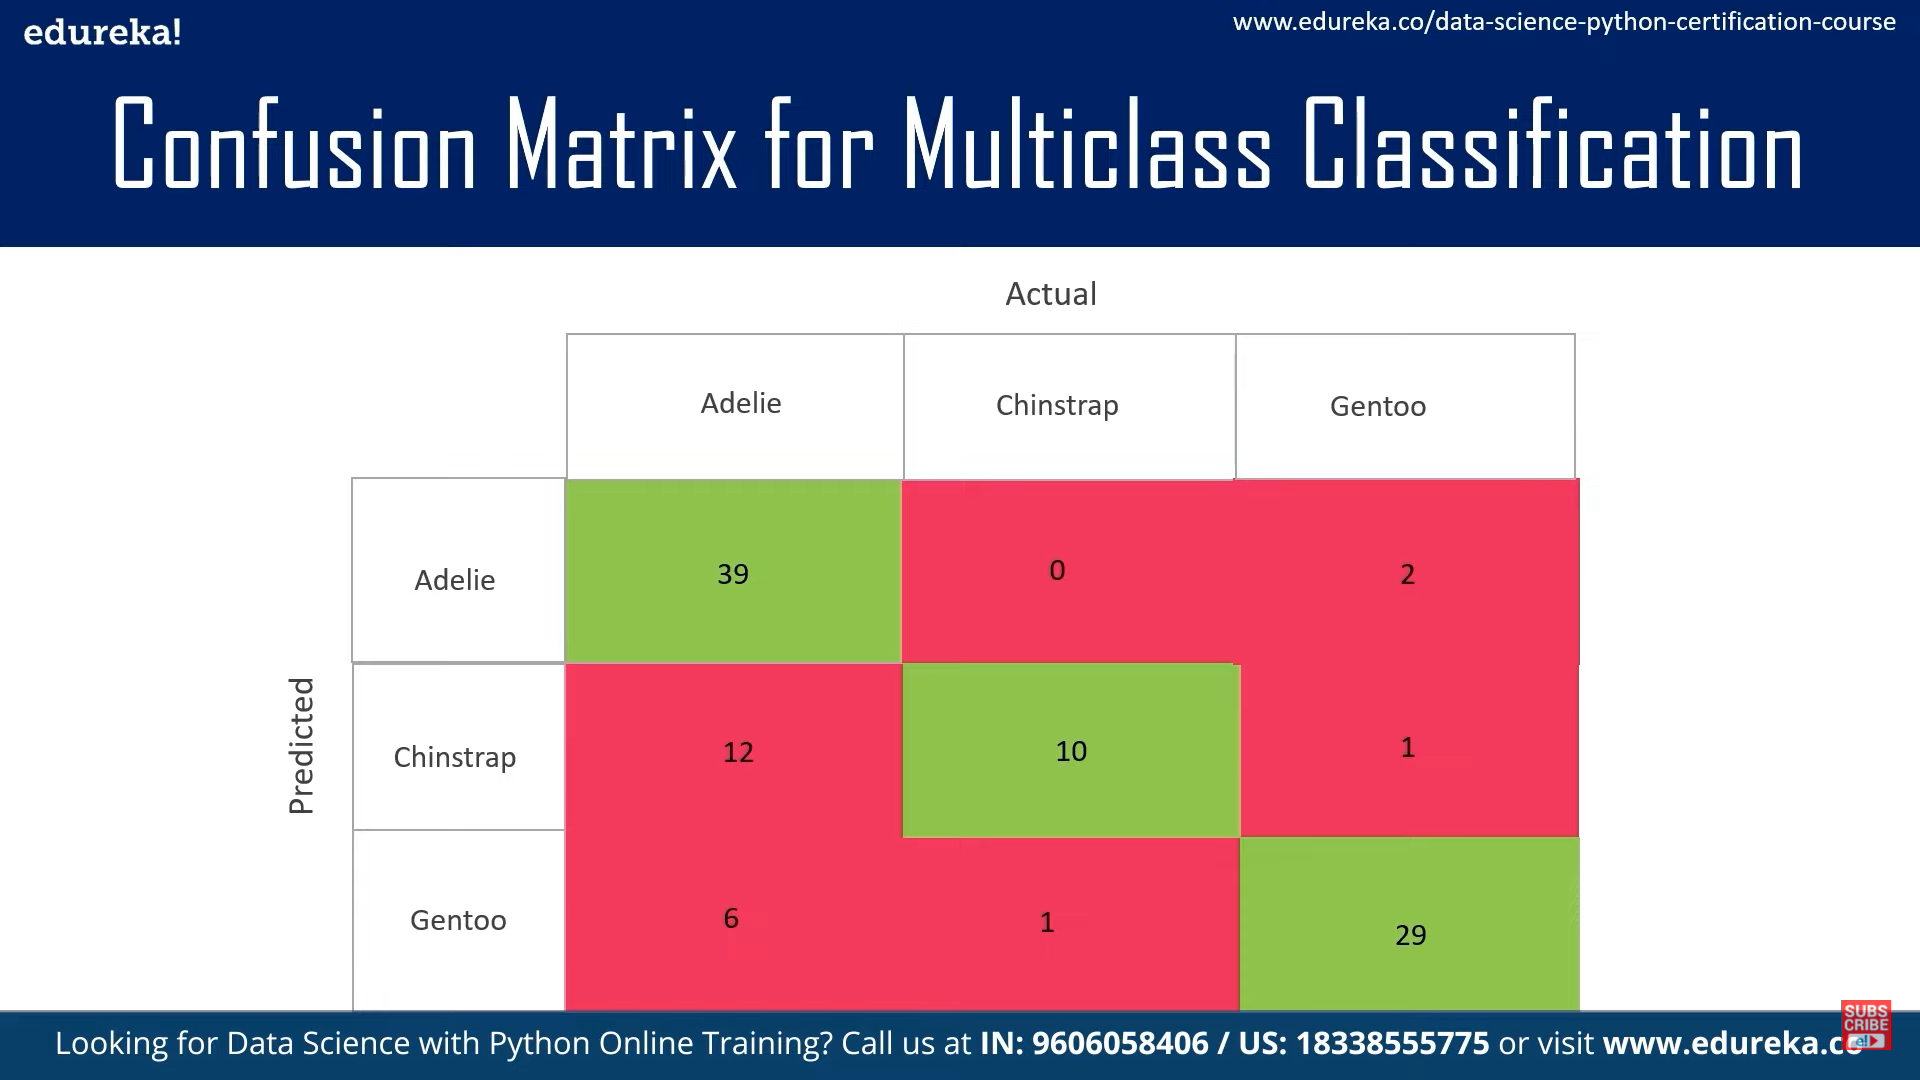

**Only principal diagonal elements arre the correctly classified instances/datasets. Rest every other cells are misclassified instances**. for example
- (1st column) : 39 adilie species were correctly classified as adelie, 12 Adelie species were incorrectly cassified/predicted as chinstrap, 6 adelie species were incorrectly classified as gentoo
- (2nd column) : 0 means no chinstrap species were incorrectly classified as adelie, 10 chinstrap species were correctly classified as chinstrap, 1 chinstrap species is incorrectly classified as gentoo.
- (last i.e. 3rd column) : 2 gentoo species were incorrectly classified as adelie, 1 gentoo was incorrectly predicted/classified as chinstrap and 20 gentoo were correctly classified as gento.

so bs ese read kro confusion matrix ko >2 classes hone pr. TP,FP,TN,FN ke confussion me uljhne ka prayas mt kro.



# calculating TP, TN, FP, FN Metrices **for Adelie class** of pengvins using above confusion matrix

[watch this youtube video to understand more, vaise below text is sufficient though](https://www.youtube.com/watch?v=MQOhioZz4Bs)

TP = 39 : total 39 pengvins which were actually adelie, are classified as adelie i.e. corresponding diagonal element

FN = *adelie predicted row me*, actual adelie column ke alava sari values ka sum = 0 +2 = 2

FP = *Actual Adelie column me*, predicted adelie row ke alava sbhi values ka sum = 12 + 6 = 18

TN = *Adelie row*(first row i.e index 0 row) and *adelie column*(first column i.e. index 0 column) ko pura chhod do, *baki sari values ka sum* will be the TN for adelie = 10+1+1+29 = 41




**Explanation of confusion matrix generated in our 10 classification labels problem**

 **The diagonal cells from the top-left to the bottom-right represent true positives i.e. correctly classified datasets, while the off-diagonal cells represent false positives and false negatives. i.e. misclassifications or errors**

Assuming you have 10 classes labeled from 0 to 9, here's a simplified example of a confusion matrix: assume horizontal = actual and vertical = predicted as the above 3\*3 matrix

```
          Class 0   Class 1   Class 2   Class 3   Class 4   Class 5   Class 6   Class 7   Class 8   Class 9
Class 0   965       1         1         0         0         2         5         3         3         0
Class 1   0         1125      2         1         0         0         2         0         5         0
Class 2   1         2         1005      6         5         1         2         5         5         0
Class 3   2         1         8         965       0         22        0         3         5         4
Class 4   1         0         0         1         964       1         7         1         1         6
Class 5   3         0         0         7         1         873       5         0         1         2
Class 6   2         2         0         0         2         10        940       0         2         0
Class 7   0         6         10        5         6         1         1         985       3         11
Class 8   4         3         8         9         2         17        1         1         924       5
Class 9   0         3         0         5         12        8         1         5         2         973
```

1. all diagonals are true positives = correctly classsified datapoints. Except the diagonal everything else is error or misclassified.
2. upar 3\*3 ke similar kisi class ko pakdo and uske TP,TN,FP,FN ko calculate kr lo
3. suppose class 5 ke liye TP,FP,TN,FN calculate krna hai.
- TP = diagonal element i.e. intersection of class 5 row and claass 5 column = 873 , i.e., total 873 class 5 were correctly predicted/classified as class 5
- FN = CLASS 5 predicted row me, actual class 5 prediction column ke alava sari values ka sum = 0+0+7+1+5+0+1+2 = 16 .
- FP = class 5 column ka pura sum, except class 5 row value = 2+0+1+22+1+10+1+17+8 = 62
- TN = class 5 column and class 5 row , is + sybol jaise shape ko chodkar sara sum

TN = full matrix sum - class(5) row sum - class(5) column sum



# Same thing to calculate TP, TN, FP, FN for any class in more professional way, generated by chatgpt

To calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for a specific class in a 10-label confusion matrix generated by TensorFlow or any other tool, you can use the following formulas for a given class, let's say Class 5:

- **True Positives (TP):** The number of instances of Class 5 that were correctly predicted as Class 5.
  - TP for Class 5 = `confusion_matrix[5][5]`

- **True Negatives (TN):** The number of instances that do not belong to Class 5 and were correctly predicted as not belonging to Class 5 for all other classes except Class 5.
  - TN for Class 5 = Sum of all values in the confusion matrix except row 5 and column 5. This includes all true negatives for all classes except Class 5.

- **False Positives (FP):** The number of instances of other classes that were incorrectly predicted as Class 5.
  - FP for Class 5 = Sum of all values in column 5 (excluding the cell at row 5, column 5) except for Class 5.

- **False Negatives (FN):** The number of instances of Class 5 that were incorrectly predicted as other classes.
  - FN for Class 5 = Sum of all values in row 5 (excluding the cell at row 5, column 5) except for Class 5.

You can use these formulas to extract TP, TN, FP, and FN values for any specific class in the confusion matrix. Make sure to access the specific row and column corresponding to the class of interest in the confusion matrix to obtain the values for that class.

VERY GOOD. CHATGPT NE KAFI BADHIYA RESPONSE DIYA. Now using these 4 TP,FP,TN,FN, we can calculate accuracy, precission, recall, etc sb kuch for the class 5

In [36]:
# define accuracy, precision, recall for any class/label/category of output with their formula

Certainly, here are the definitions and formulas for accuracy, precision, and recall for a given class:

1. **Accuracy:** Accuracy is a measure of how many instances are correctly classified (both true positives and true negatives) among all instances.

   Formula:
   Accuracy = (TP + TN) / (TP + TN + FP + FN)

2. **Precision:** Precision measures the proportion of true positive predictions out of all positive predictions. It assesses the accuracy of the positive predictions.

   Formula:
   Precision = TP / (TP + FP)

3. **Recall (Sensitivity or True Positive Rate):** Recall measures the proportion of true positive predictions out of all actual positives. It assesses the model's ability to find all positive instances.

   Formula:
   Recall = TP / (TP + FN)

For each of these metrics, you can use the TP, TN, FP, and FN values from the confusion matrix to calculate them. Just substitute the values into the corresponding formula for the specific class you are interested in.

In [37]:
#f1 anf f2 scores



1. **F1 Score:** The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. It is a measure of a model's accuracy in terms of both positive predictions and the ability to find all positive instances.

   Formula:
   F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

2. **F2 Score:** The F2 score is a variant of the F1 score that places more emphasis on recall than precision. It gives higher weight to recall, which is important when minimizing false negatives is a priority.

   Formula:
   next image me

For both the F1 and F2 scores, you can use the precision and recall values calculated using the corresponding formulas as mentioned earlier. These scores provide a single value that summarizes the model's performance, taking both precision and recall into account.

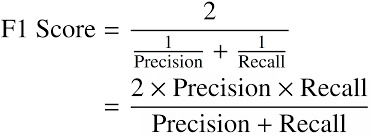

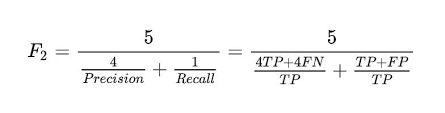

# finally confusion matrix and usse related itne theory ke bad, let's continue our project

Text(0.5, 47.7222222222222, 'Predicted Labels')

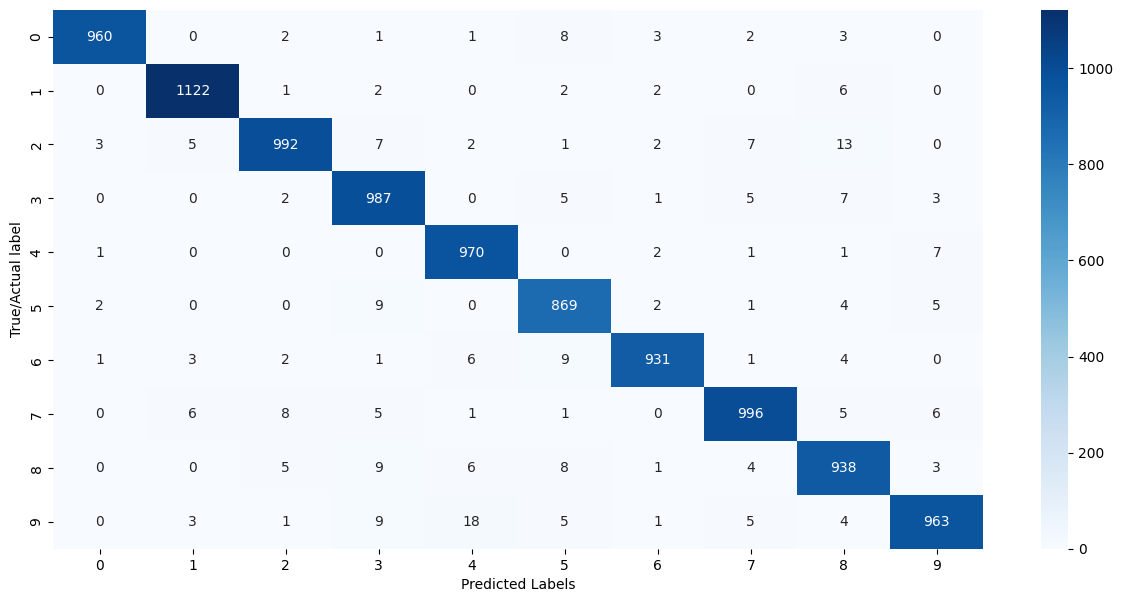

In [38]:
# heatmap for confusion matrix

plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd' , cmap = 'Blues')
plt.ylabel('True/Actual label')
plt.xlabel('Predicted Labels')


In a confusion matrix created by tensorflow.math, the x-axis typically represents the predicted labels, and the y-axis represents the actual labels.

So upar jo hmne theory discuss kiya uske corresponding x and y lables are swapped in tensorflow.math generated confusion matrix

# Building the predictive system to predict an hsndwritten digit, by the model

In [40]:
input_image_path='/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [41]:
type(input_image)

numpy.ndarray

In [42]:
print(input_image) # numpy array, but seems like 3D , lets check khin rgb to nhi hai

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


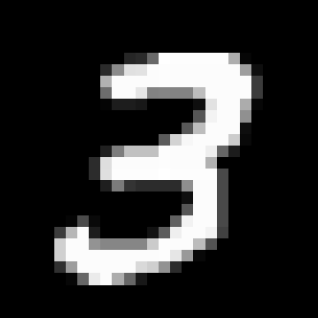

In [43]:
cv2_imshow(input_image) # numpy array se image dekhna

In [44]:
input_image.shape # this is rgb is image as 3 likh hua hai 3rd parameter

(318, 318, 3)

In [45]:
# model is trained on grayscale and 28*28 pixels image
# so do the changes
# rgb to grayscale and resizing by pixel reduction

In [46]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [47]:
grayscale.shape

(318, 318)

In [49]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [50]:
input_image_resize.shape

(28, 28)

In [51]:
cv2_imshow(input_image_resize) # colab don't allow to use the actual function cv2.imshow(), but gives similar function cv2_imshow() to use

In [52]:
# input data pr jo kuch bhi kiya tha, do the same here as well
input_image_resize = input_image_resize/255  # all values scaled and are between 0 and 1

In [53]:
type(input_image_resize)

numpy.ndarray

In [55]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

# previous ml me predictive systems me (1,-1) krte the, same uska alternative here
# this is just to tell the system/neural network that we are going to predict for one image only , not 10000 or 60000 images
# like vhan(ml projects me) array/list ko table me convert krke input diya krte the
# same smjhlo yhan bhi, vaisa hi kuch hai
# [1,28,28] = NN model suno , we are going to predict just for 1 image whose dimensions aree 28*28

## rgb prediction me : [1,28,28,3] ye 4 input dena hota : first 1 is just for telling hm 1 input de rhe hain for prediction, last 3 is property of rgb

In [56]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 31ms/step
[[3.4283454e-09 4.1662477e-04 2.9015362e-03 1.0000000e+00 2.9241694e-13
  5.1320839e-01 8.9709160e-17 2.4510242e-05 9.9823660e-01 7.7814066e-01]]


In [57]:
# finding the label out of all these 10 probabilities

input_pred_label = np.argmax(input_prediction)

In [58]:
print(input_pred_label)

3


In [59]:
# bingo , our model predicted correctly

# combining all the codes for predictive system

Path of the image to be predicted/content/MNIST_digit.png
Showing the input handwritten image


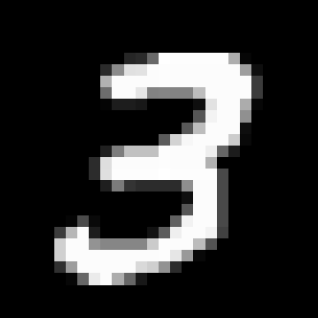

1/1 [==============================] - 0s 21ms/step
the handwritten digit is recognized as  3


In [61]:
input_image_path= input("Path of the image to be predicted")

input_image = cv2.imread(input_image_path)

print("Showing the input handwritten image")
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

input_reshapes = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('the handwritten digit is recognized as ', input_pred_label)